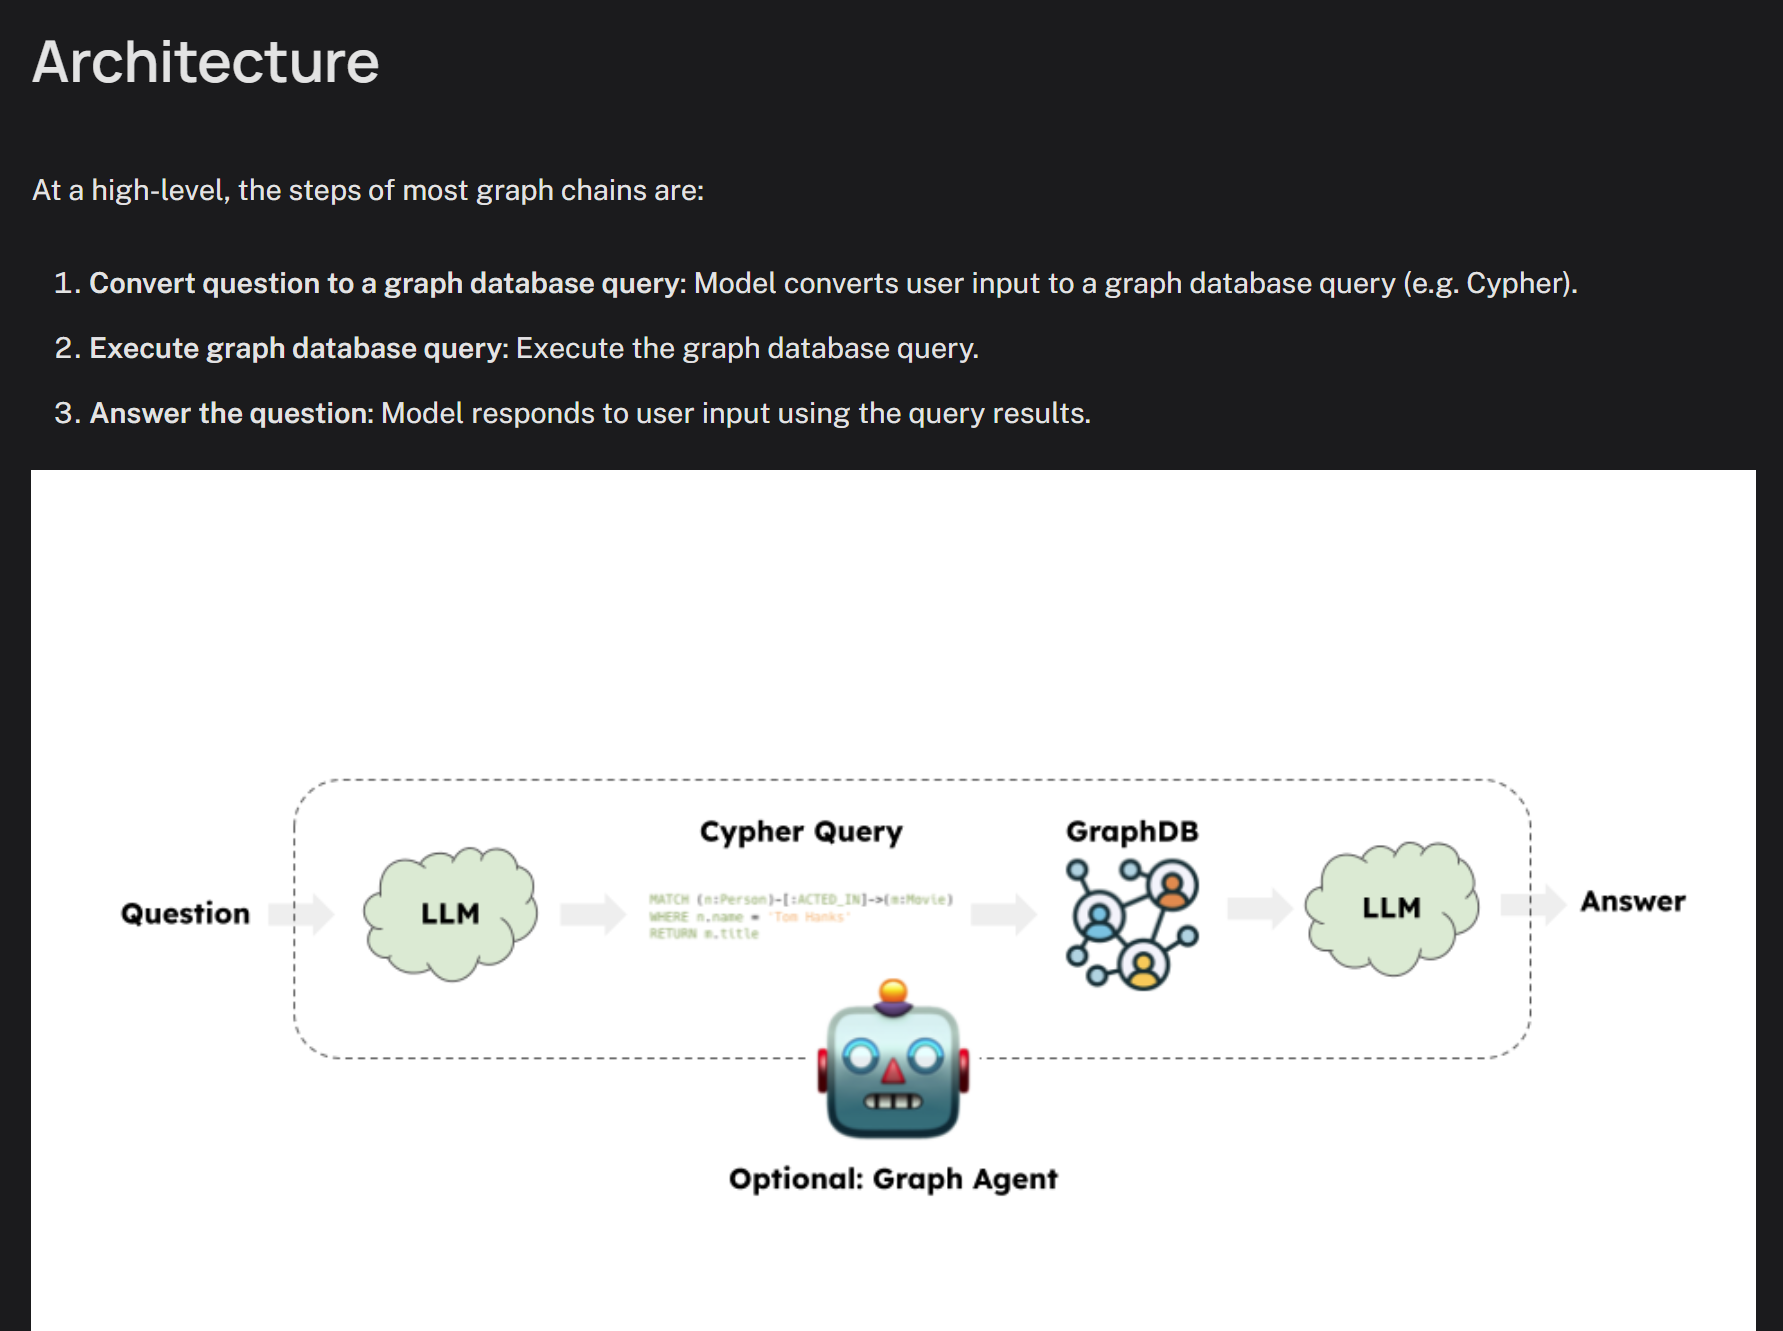

In [1]:
! pip install --upgrade --quiet neo4j

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["LANGCHAIN_TRACING_V2"] = "true"

Next, we need to define Neo4j credentials. Follow these installation steps to set up a Neo4j database. - https://neo4j.com/docs/operations-manual/current/installation/

In [ ]:
os.environ["NEO4J_URI"] = "bolt://localhost:7687"
os.environ["NEO4J_USERNAME"] = "neo4j"
os.environ["NEO4J_PASSWORD"] = "password"

In [ ]:
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph()

# Import movie information

movies_query = """
LOAD CSV WITH HEADERS FROM 
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv'
AS row
MERGE (m:Movie {id:row.movieId})
SET m.released = date(row.released),
    m.title = row.title,
    m.imdbRating = toFloat(row.imdbRating)
FOREACH (director in split(row.director, '|') | 
    MERGE (p:Person {name:trim(director)})
    MERGE (p)-[:DIRECTED]->(m))
FOREACH (actor in split(row.actors, '|') | 
    MERGE (p:Person {name:trim(actor)})
    MERGE (p)-[:ACTED_IN]->(m))
FOREACH (genre in split(row.genres, '|') | 
    MERGE (g:Genre {name:trim(genre)})
    MERGE (m)-[:IN_GENRE]->(g))
"""

graph.query(movies_query)

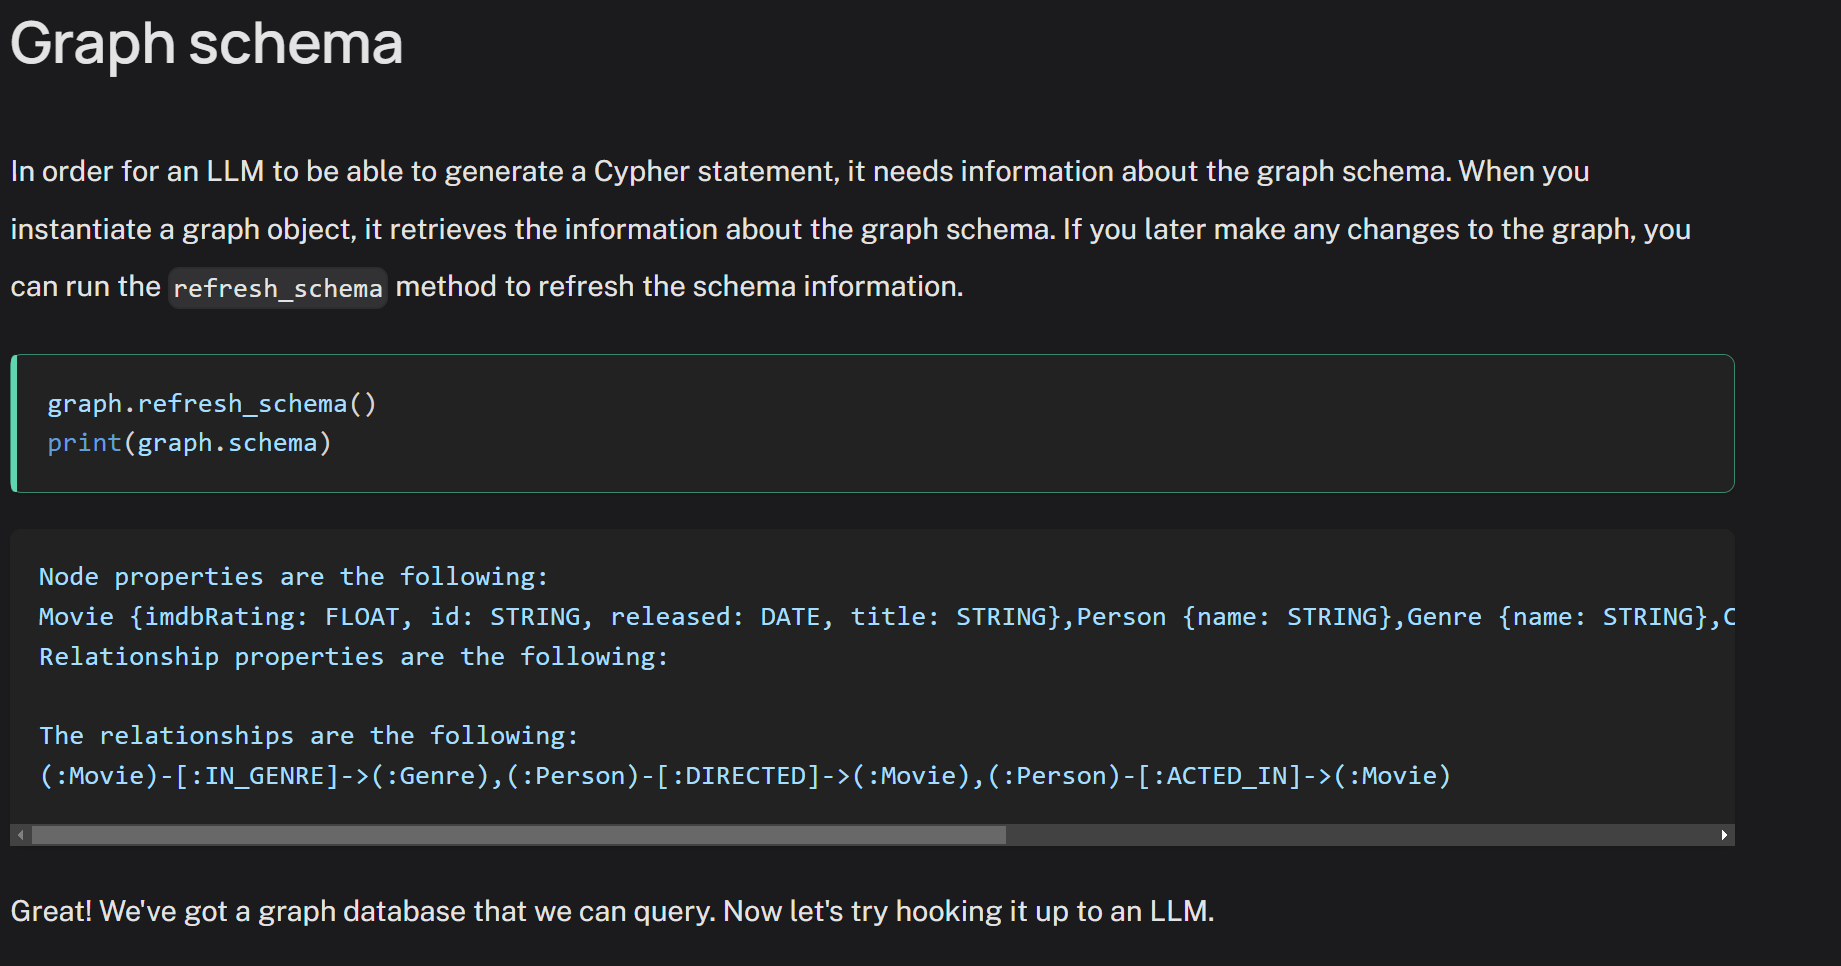

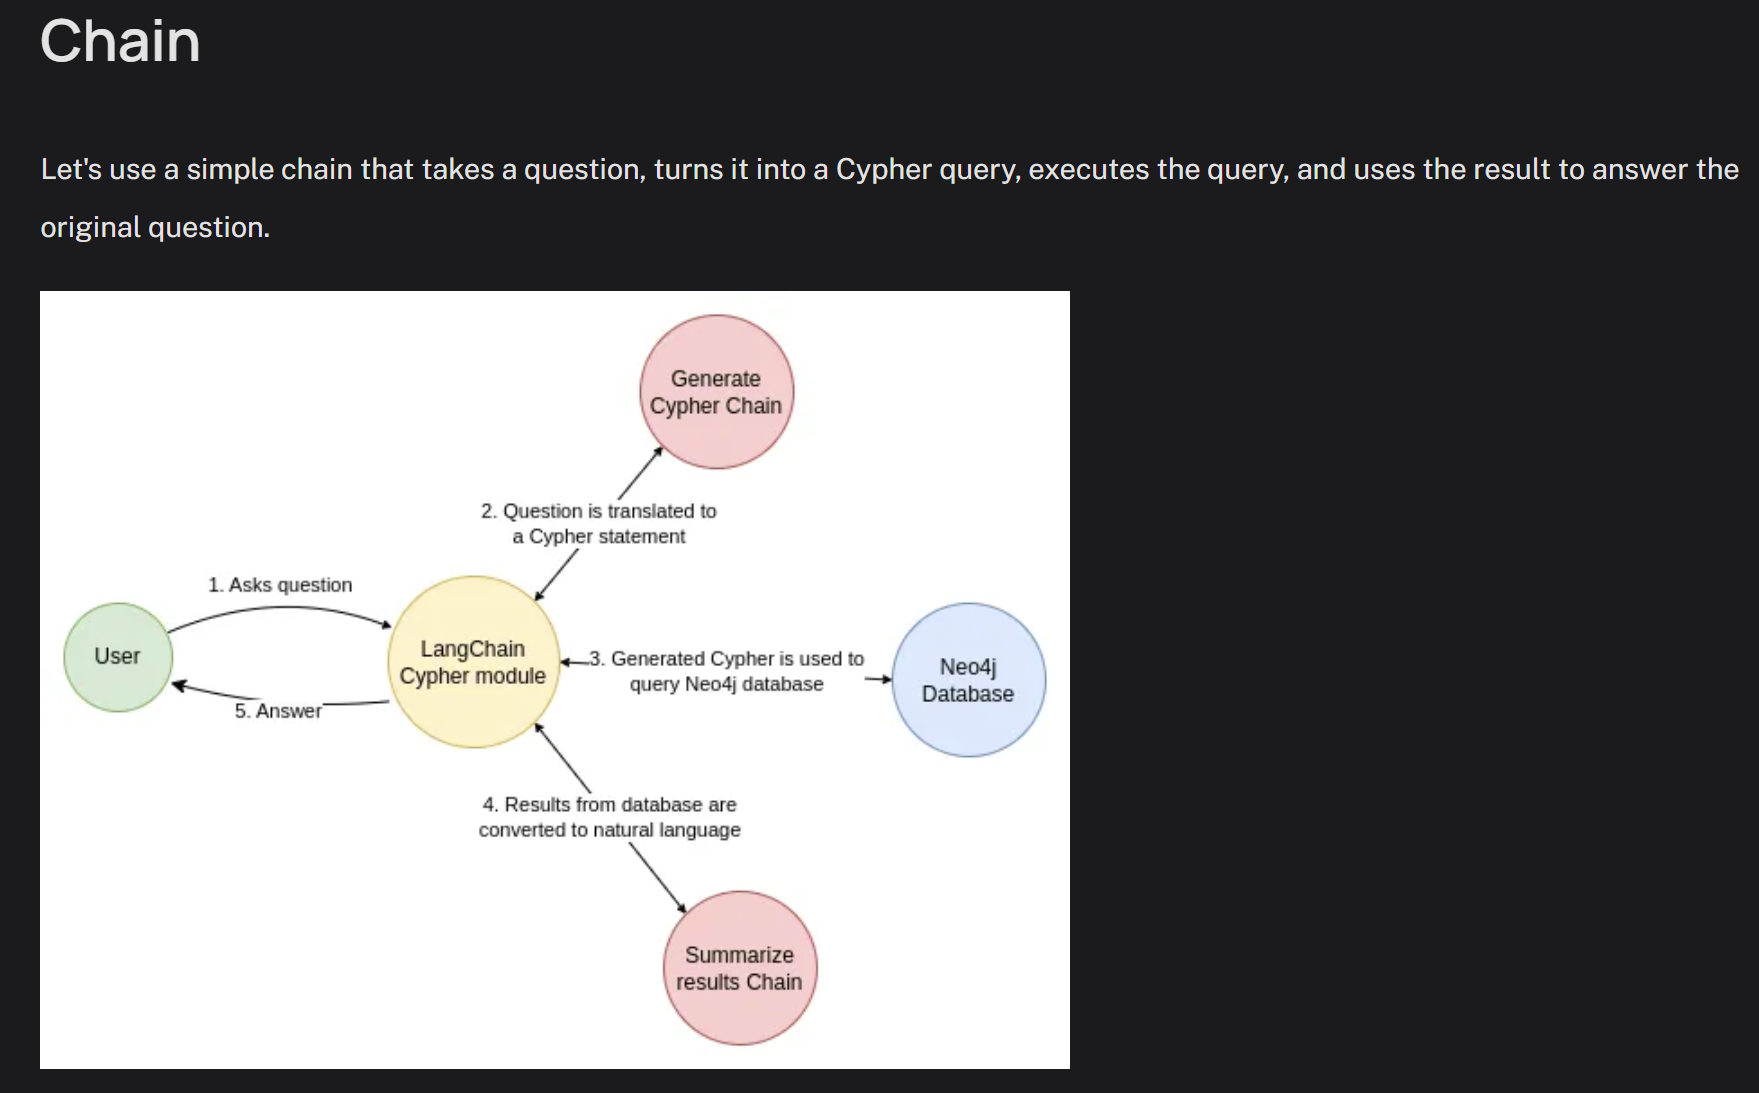

In [ ]:
from langchain.chains import GraphCypherQAChain
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
chain = GraphCypherQAChain.from_llm(graph=graph, llm=llm, verbose=True)
response = chain.invoke({"query": "What was the cast of the Casino?"})
response

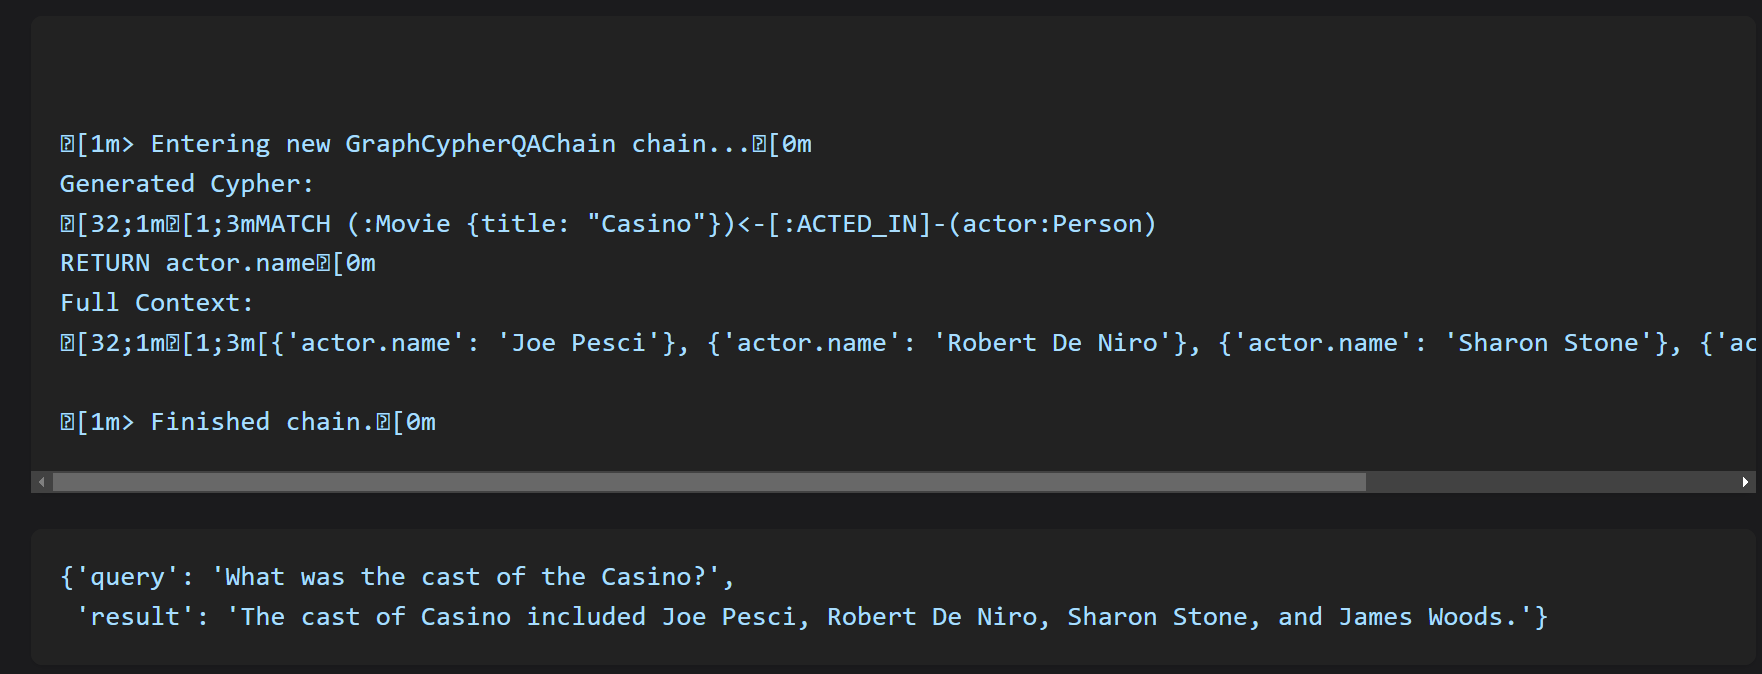

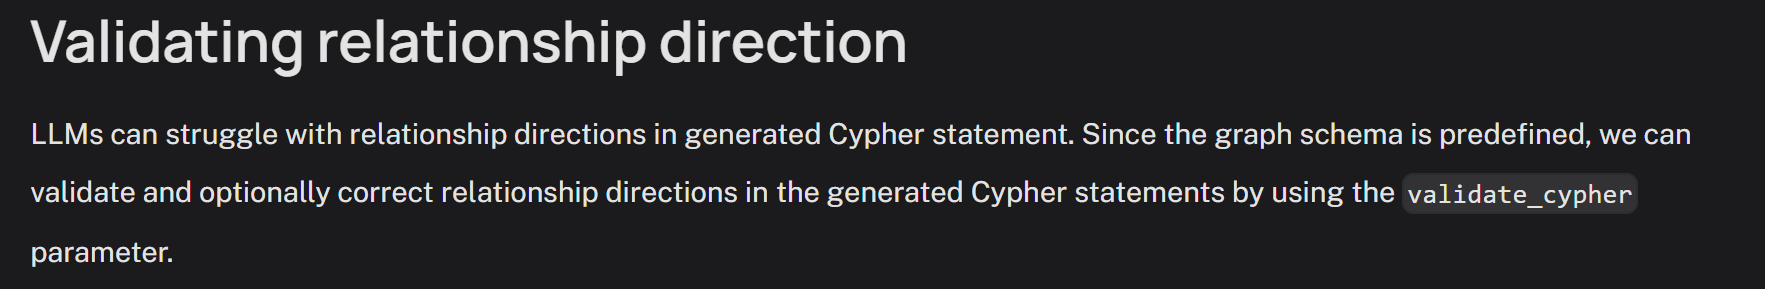

In [ ]:
chain = GraphCypherQAChain.from_llm(
    graph=graph, llm=llm, verbose=True, validate_cypher=True
)
response = chain.invoke({"query": "What was the cast of the Casino?"})
response

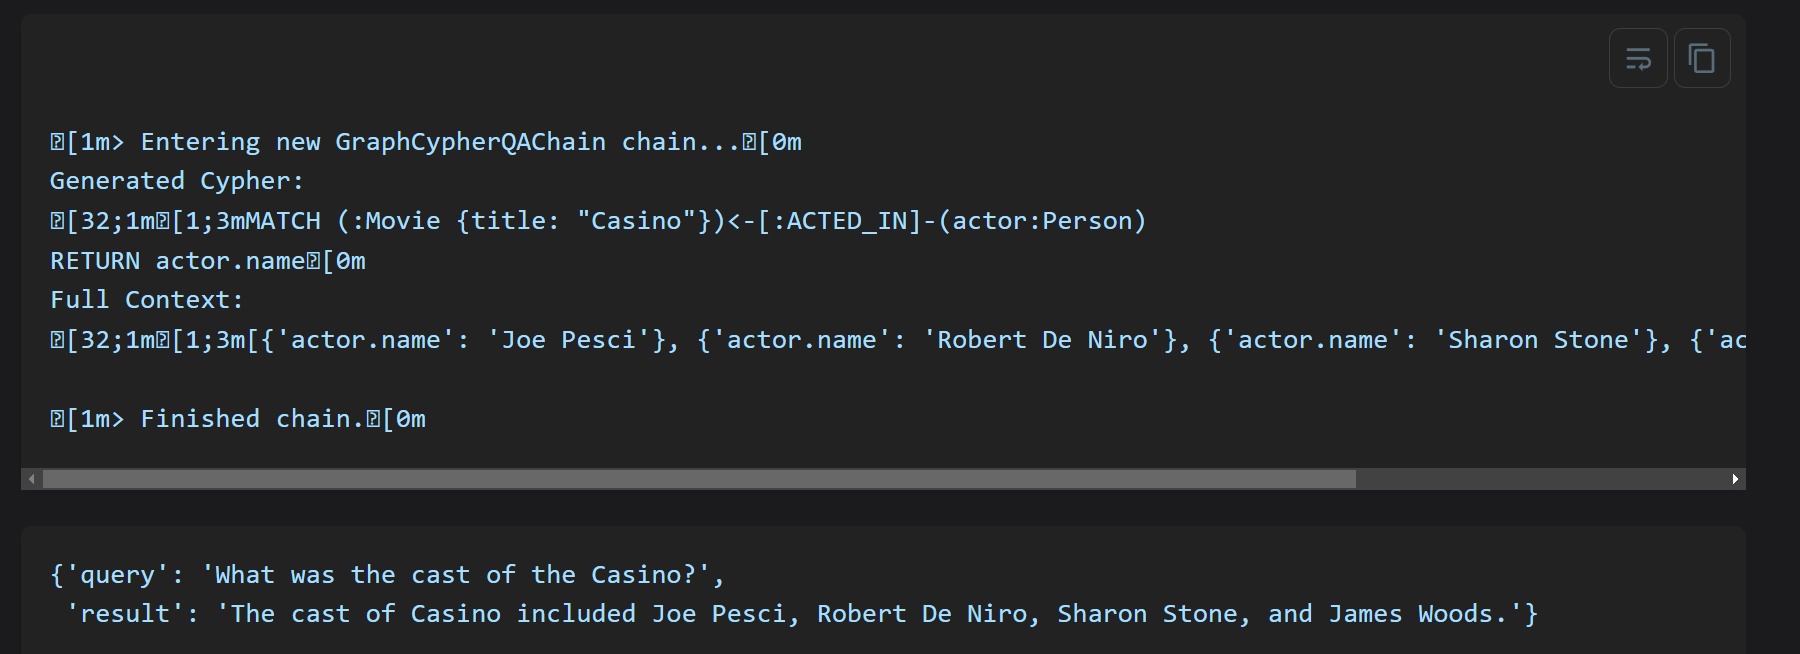